In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from src.imagenet_x import get_factor_accuracies, error_ratio
from src.imagenet_x.utils import load_model_predictions, get_annotation_path
from src.imagenet_x import plots
from src.imagenet_x.evaluate import ImageNetX, get_vanilla_transform, ImageNetXImageFolder, load_annotations
import os
import pickle
from pathlib import Path

In [48]:
df1 = pd.read_csv('../metalabel_objectivity/val_imgs_df.csv')
samples = df1.sample(6)

samplescols = samples.columns[1:17]
k = samples.iloc[:, 1:17].values
samples_labels = []
l1 = []
for item in k:
    l1 = []
    for i, thing in enumerate(item):
        if thing == 1:
            l1.append(samplescols[i])
    samples_labels.append(l1)

samples['labels'] = samples_labels

root = "../data/ImageNetVal/"

l1 = {}
for path, subdirs, files in os.walk(root):
    for name in files:
        l1[name] = os.path.join(path, name)

samples['path'] = samples['file_name'].apply(lambda x: l1[x])

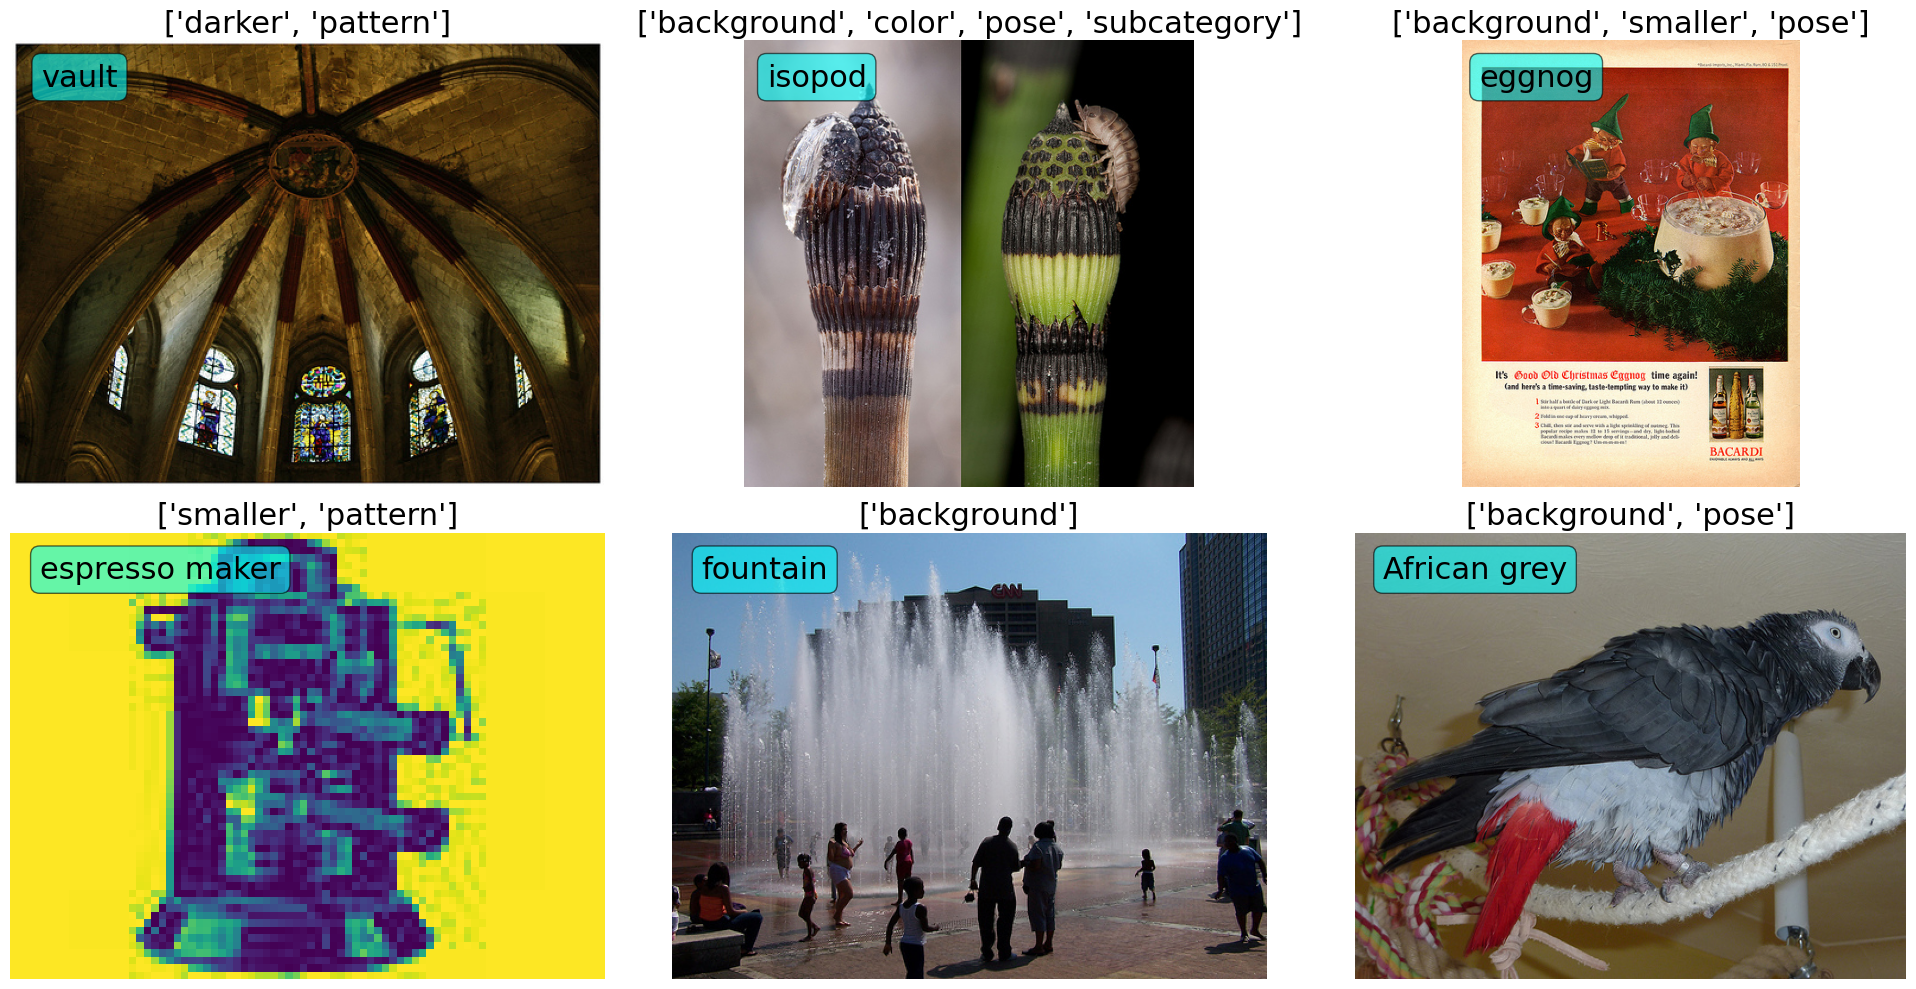

In [55]:
# plot 6 in a grid with matplotlib cropping them
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    img = plt.imread(samples.iloc[i]['path'])
    ax.imshow(img)
    ax.set_title(samples_labels[i], fontsize=22)
    props = dict(boxstyle='round', facecolor='cyan', alpha=0.6)
    ax.text(0.05, 0.95, samples.iloc[i]['str_label'], transform=ax.transAxes, fontsize=22,
        verticalalignment='top', bbox=props)
    ax.axis('off')
fig.tight_layout()

fig.savefig('../figures/imagenet_x_examples.png')

In [50]:
samples

,file_name,multiple_objects,background,color,brighter,darker,style,larger,smaller,object_blocking,...,pose,shape,subcategory,texture,justification,one_word,label,str_label,labels,path
898,ILSVRC2012_val_00010559.JPEG,0,0,0,0,1,0,0,0,0,...,0,0,0,0,dark image of vault,dark,884,vault,"[darker, pattern]",../data/ImageNetVal/val/n04523525/ILSVRC2012_v...
13794,ILSVRC2012_val_00014138.JPEG,0,1,1,0,0,0,0,0,0,...,1,0,1,0,a Roly-poly creeping on the top of a green pla...,plant,126,isopod,"[background, color, pose, subcategory]",../data/ImageNetVal/val/n01990800/ILSVRC2012_v...
2199,ILSVRC2012_val_00012666.JPEG,0,1,0,0,0,0,0,1,0,...,1,0,0,0,a rum eggnog recipe advertisement,advertisement gnomes punchbowl,969,eggnog,"[background, smaller, pose]",../data/ImageNetVal/val/n07932039/ILSVRC2012_v...
42382,ILSVRC2012_val_00027575.JPEG,0,0,0,0,0,0,0,1,0,...,0,0,0,0,zoomed out image of espresso maker,zoomed out,550,espresso maker,"[smaller, pattern]",../data/ImageNetVal/val/n03297495/ILSVRC2012_v...
38849,ILSVRC2012_val_00001350.JPEG,0,1,0,0,0,0,0,0,0,...,0,0,0,0,people taking bathe at the fountain.,people,562,fountain,[background],../data/ImageNetVal/val/n03388043/ILSVRC2012_v...
32860,ILSVRC2012_val_00042226.JPEG,0,1,0,0,0,0,0,0,0,...,1,0,0,0,African grey is on the rope,rope,87,African grey,"[background, pose]",../data/ImageNetVal/val/n01817953/ILSVRC2012_v...
